In [64]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [65]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

In [66]:
# Direct convolution between 
def d_conv(W, X):
    # for i in range(0, len(W)):/A
        
    return (X * W)

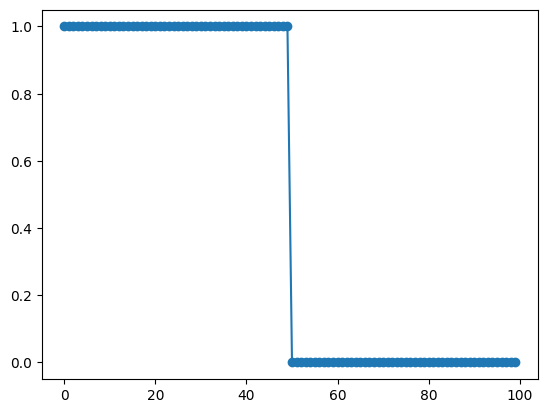

In [67]:
n = 100
x = np.arange(n)
x0 = n * 0.5
X = x < x0
X = np.array(X)
plt.plot(x,X, marker ='o')

In [140]:
# Create filter.
M = 30
delta = 25
w = np.arange(-M,M)
# H = (-2 * wavenum(w,P) * np.sin(wavenum(w,P)))/(wavenum(w,P)**2 - np.pi**2)
H = ((4 * w**2 - np.pi**2) * np.sin(w) - 2 * np.pi * w * np.cos(w)) / (4 * w**3 - np.pi**2 * w)
H[M] = 2
# H = np.zeros(M)
# H[M//2] = 1

# H[0] = 2
# print(H)
# H = np.fft.fft(H)
shift = np.zeros(M)
shift = np.exp(-2j *np.pi * delta, * wavenum(w,M)/M)
# H = H * np.exp(-2j * np.pi * delta * wavenum(w,M)/M)
# H = H / 2
plt.plot(w,H.real, marker ='o')
plt.plot(w,shift)

/tmp/ipykernel_15245/266645837.py:6: RuntimeWarning: invalid value encountered in divide
  H = ((4 * w**2 - np.pi**2) * np.sin(w) - 2 * np.pi * w * np.cos(w)) / (4 * w**3 - np.pi**2 * w)


TypeError: exp() takes from 1 to 2 positional arguments but 61 were given

In [137]:
# h = np.fft.ifft(H)
# plt.plot(w,h)

/home/dylan/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


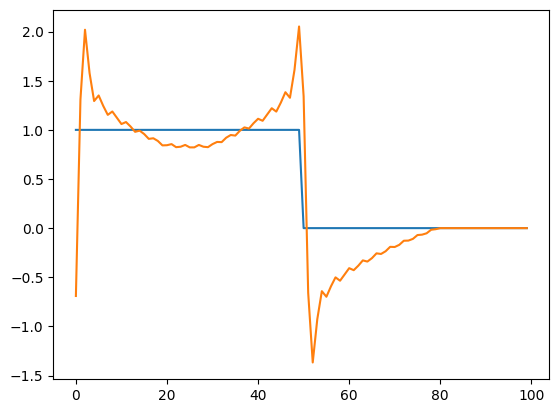

In [138]:
# Apply filter to each point of y
# h = np.fft.ifft(H)

x_shifted_filter = np.zeros(n, dtype=complex)

x_shifted_filter = np.convolve(X,H, 'same')
# x_shifted_filter /= 

# x_shifted_filter = convolve_1d(x_shifted, H)

# for i in range(n):
#     A = 0   
    
#     # At the beginning
#     if i - M//2 < 0:
#         for j in range(n - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
            
            
#     # At the end
#     elif i + M // 2 > n:
#         for j in range(i - M // 2, n):
#             A += X[j] * h[j % M]
#         for j in range(0, M // 2):
#             A += X[j] * h[j % M]
#         # print(i)
        
#     # In the middle.
#     elif i > M // 2 and i + M // 2  < n:
#         for j in range(i - M//2, i + M//2):
#             A += X[j] * h[j % M] 
            
#         # print(i)
#     x_shifted_filter[i] = A

# x_shifted_filter /= M
plt.plot(x,X)
# plt.plot(x,x_shifted.real)
plt.plot(x,x_shifted_filter)